In [13]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

from spatial_scene_grammars.torch_utils import calculate_mmd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'MMD estimate: 0.953004')

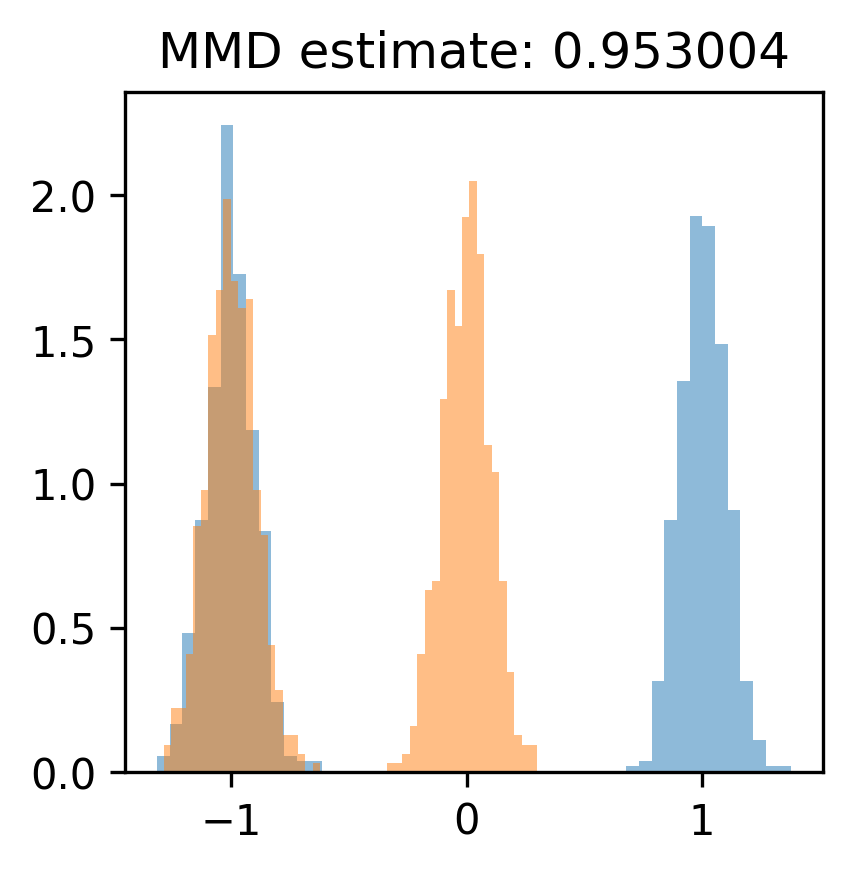

In [18]:
# Create different 1D GMMs, get a population of samples, and measure distance between them

def sample_from_gmm(N_samples, weights, means, scales):
    samples_each = (N_samples * np.array(weights)).astype(np.int)
    x = []
    for N, mean, scale in zip(samples_each, means, scales):
        x.append(np.random.normal(mean, scale, (N,)))
    return np.concatenate(x)
        
x_1 = sample_from_gmm(1000, [0.5, 0.5], [-1, 1], [0.1, 0.1])
x_2 = sample_from_gmm(1000, [0.5, 0.5], [-1, 0.], [0.1, 0.1])

plt.figure(dpi=300).set_size_inches(3, 3)
plt.hist(x_1, label="1", alpha=0.5, bins=50, density=True)
plt.hist(x_2, label="2", alpha=0.5, bins=50, density=True)

# Calculate MMD between them2
mmd = calculate_mmd(
    torch.tensor(x_1).unsqueeze(1),
              torch.tensor(x_2).unsqueeze(1),
              alphas=[0.1, 0.5, 1.0, 2.0]
).item()
plt.title("MMD estimate: %f" % mmd)